In [1]:
#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize



#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex5\ex5\ex5data1.mat')

mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [2]:
#Extracting the contents

# Training Set
X = mat_contents['X']
Y = mat_contents['y']

#Cross Validation Set
Xval = mat_contents['Xval']
Yval = mat_contents['yval']

#Test Set
Xtest = mat_contents['Xtest']
Ytest = mat_contents['ytest']

m,n = X.shape

print(X.shape)
print(Y.shape)

(12, 1)
(12, 1)


In [3]:
print(X.shape)

def polyFeature(Xtemp,p):
    m,n = Xtemp.shape
    X_poly = np.zeros((m,p))
    
    for i in range(0,p):
        X_poly[:,i] = (Xtemp**(i+1)).flatten()
        
    return X_poly

(12, 1)


In [4]:
#Adding the polynomial features to the X
p = 8

#Now adding feature upto d = 8(degree)
X_poly = polyFeature(X,p)

print(X_poly.shape)

(12, 8)


In [5]:
#Function for normalizing the features
def featureNormalize(X_poly):
    mu = np.zeros((X_poly.shape[1],1))
    sigma = np.zeros((X_poly.shape[1],1))
    for i in range(X_poly.shape[1]):
    
        mu[i] = X_poly[:,i].mean() # mean of the whole X(12 , 8) matrix not containing the bias unit

        sigma[i] = X_poly[:,i].std() # standard deviation of the whole X(12 , 8) matrix not containing the bias unit

        X_poly[:,i] = (X_poly[:,i]-mu[i])/sigma[i] #Normalizing each element of the matrix
    
    return X_poly,mu.transpose(),sigma.transpose()



In [6]:
X_poly,mu,sigma = featureNormalize(X_poly)

X_poly = np.insert(X_poly,0,1,1)

print(X_poly)

[[ 1.00000000e+00 -3.78243704e-01 -7.88662325e-01  1.90328720e-01
  -7.37591303e-01  3.20251970e-01 -6.17151602e-01  3.59835014e-01
  -5.31091256e-01]
 [ 1.00000000e+00 -8.38920100e-01  1.31420204e-03 -2.58961742e-01
  -3.41564822e-01  9.75492734e-02 -4.55196644e-01  2.66773432e-01
  -4.68873807e-01]
 [ 1.00000000e+00  1.43871736e+00  6.10831582e-01  1.30534069e+00
   2.56220001e-01  1.02186338e+00 -1.26962121e-02  7.90210009e-01
  -1.77926980e-01]
 [ 1.00000000e+00  1.48412330e+00  7.38068463e-01  1.42031240e+00
   4.13121830e-01  1.15534830e+00  1.31223708e-01  9.10700224e-01
  -6.22895388e-02]
 [ 1.00000000e+00 -1.49791929e+00  1.93643966e+00 -2.12774745e+00
   2.43510061e+00 -2.51876748e+00  2.71792174e+00 -2.76331690e+00
   2.88908182e+00]
 [ 1.00000000e+00 -1.34409278e-01 -1.01936614e+00  2.62563148e-01
  -7.72577738e-01  3.31046537e-01 -6.21453712e-01  3.61188658e-01
  -5.31586524e-01]
 [ 1.00000000e+00  7.10844248e-01 -8.14713668e-01  3.55803314e-01
  -7.43368461e-01  3.4102766

In [7]:
print(mu)

[[-5.08542635e+00  8.48904834e+02 -1.28290173e+04  1.28967789e+06
  -2.98314592e+07  2.29330301e+09 -6.84527284e+10  4.42233759e+12]]


In [8]:
#calculating htheta(x)
def hypothesis(theta,X):
    return X.dot(theta)

In [9]:
#1.2 Regularized linear regression cost function

#calculating the cost of the regularized linear regression
def linearRegCostFunction(theta,X, Y, Lambda,m):
    m,n = X.shape
    #print(m)
    theta = theta.reshape(p+1,1)
    
    #computing the term 1 of the cost function
    term1 = (((hypothesis(theta,X) - Y)**2).sum())/(2*m)
    
   
    #computing regularized term for the cost function
    
                              #here column 1 i,e theta[0]
                              #not be included so slicing is done
    term2 = (Lambda/(2*m)) * ((theta**2).sum() -( theta[0]**2).sum())
    
    #computing the cost term1 + term2(regularized term)
    cost = term1 +  term2
    
    return cost

 #COMPUTING THE GRADIENTS
def gradient(theta,X, Y, Lambda,m):
   
    theta = theta.reshape(p+1,1)
    
    #computing (htheta(x) - y)/m
    hypMinusY = (hypothesis(theta,X) - Y)/m
    
    #computing gradient for theta[0]
    grad1 = hypMinusY.sum() 
    
    #computing gradient for theta[1]

    grad2 = (hypMinusY.transpose()).dot(np.delete(X,0,1)) +  (Lambda/m)*(theta[1:]).reshape(1,8)
    
    
    return (np.insert(grad2,0,grad1,1)).flatten()

In [10]:
m,n = X_poly.shape

print(X_poly.shape)
print(Y.shape)

(12, 9)
(12, 1)


In [11]:
#Training the parameters using fmincg
def trainLinearReg(X, y, Lambda,msize):
    
    #initializing thetas with the zeros
    initial_theta = np.zeros((p+1,1))
    
    #Calling the optimize function
    import scipy
                                    #it will call the our                           #computing with the 
                                    #optimize function                              #gradient
    result = scipy.optimize.fmin_cg(linearRegCostFunction,x0=initial_theta.flatten(),\
                args=(X, y, Lambda,msize),maxiter=60000,disp=True,full_output=True) 
    
    return(result[0])


In [12]:
Lambda = 0
FinalTheta = trainLinearReg(X_poly, Y, Lambda,m)



Optimization terminated successfully.
         Current function value: 0.028899
         Iterations: 1236
         Function evaluations: 25652
         Gradient evaluations: 2332


In [13]:
print(FinalTheta)

[ 11.21758908   9.16076978  18.21326996  28.64296417 -27.48175481
 -73.66833999   7.42009186  60.01113556  20.06683975]


In [14]:
def polyFeat(X,p):
    #m1,n1 = X.shape
    X_poly = np.zeros((3112,p))
    
    for i in range(0,p):
        X_poly[:,i] = (X**(i+1)).flatten()
        
    return X_poly

In [15]:
print(FinalTheta.shape)

(9,)


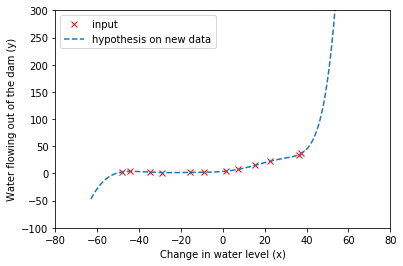

In [16]:
## Plotting the graph

plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.ylim(-100,300)
plt.xlim(-80,80)

#plotting initial data
plt.plot(X,Y,'rx',label = 'input')

#plotting hypothesis on training data
#plt.plot(X,X_poly.dot((FinalTheta).reshape(n,1)),'bo',label = 'hypothesis on train data')

#creating new data
x = np.arange(X.min()-15,X.max()+55,0.05)

#adding polnomial to the new data
xpoly = polyFeat(x,p)

#normalizing the new data in which mean and sigma are of training data(column wise)
xpoly = (xpoly-mu)/sigma

#inserting the bias unit
xpoly = np.insert(xpoly,0,1,1)

#plotting the graph on new data
plt.plot(x,(xpoly.reshape(3112,p+1)).dot(FinalTheta.reshape(p+1,1)),'--',label = 'hypothesis on new data')

plt.legend()


# Plotting the graph b/w the J(train) error and J(validation) errror


In [17]:
def learningCurve(X,Y,Xval,Yval,Lambda):
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))

    for i in range(1,m+1):
        
        #Learning parameter for i training size
        Theta = trainLinearReg(X[0:i,:], Y[0:i], Lambda,i) #Lambda = 1 is sent here because we have to train the theta at 1

        
        #training error
        error_train[i-1] = linearRegCostFunction(Theta,X[0:i,:],Y[0:i],0,i)   #  Lambda = 0 is sent here 
                                                                              #  because for error terms we have 
                                                                              #  regularized term = 0 so to make it zero
                                                                              #  we send Lambda  0 here
        #Cross validation error
        error_val[i-1] = linearRegCostFunction(Theta,Xval,Yval,0,21)
        
    return error_train,error_val


In [18]:

#adding polynomial terms to the Cross Validation Set
Xvalpoly = polyFeature(Xval,p)

print(Xvalpoly.shape)
#Normalizing the cross validation set
Xvalpoly = (Xvalpoly - mu)/sigma

#adding the bias unit
Xvalpoly = np.insert(Xvalpoly,0,1,1)




(21, 8)


In [19]:
#We have to train the data and plot it at lambda = 1
Lambda = 1 

#taking the error obtained on training the data and on the Cross validating
error_train, error_val = learningCurve(X_poly, Y,Xvalpoly, Yval,Lambda);

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 319
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 21
         Function evaluations: 407
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 31
         Function evaluations: 594
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 14
         Function evaluations: 319
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 9.347014
         Iterations: 32
         Function evaluations: 

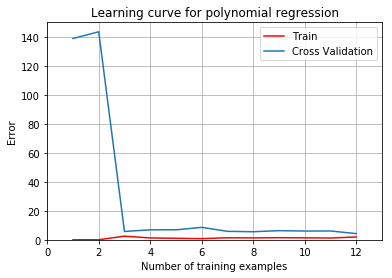

In [20]:
#Plotting graph between J(train) error and J(Cross validation) with training set size
plt.title('Learning curve for polynomial regression')

plt.xlabel('Number of training examples')
plt.ylabel('Error')

plt.xlim(0,13)
plt.ylim(0,150)
plt.grid(True)

plt.plot(np.arange(1,m+1),error_train,'r-',label = 'Train')
plt.plot(np.arange(1,m+1),error_val,'-',label = 'Cross Validation')

plt.rc('figure', figsize=(11, 7))

plt.legend()

In [21]:
error_val


array([[138.84677392],
       [143.50269294],
       [  5.74963253],
       [  6.89012278],
       [  6.90061704],
       [  8.58128826],
       [  5.84229302],
       [  5.57591979],
       [  6.30029593],
       [  6.03357842],
       [  6.08973855],
       [  4.26334965]])

In [22]:
error_train

array([[3.59687227e-16],
       [4.28363954e-02],
       [2.51521298e+00],
       [1.28553771e+00],
       [1.02832109e+00],
       [7.94928947e-01],
       [1.40995127e+00],
       [1.31622359e+00],
       [1.45873643e+00],
       [1.35329767e+00],
       [1.22854217e+00],
       [1.95868847e+00]])

# Selecting λ using a cross validation set

In [23]:
"""%VALIDATIONCURVE Generate the train and validation errors needed to
%plot a validation curve that we can use to select lambda
%   [lambda_vec, error_train, error_val] = ...
%       VALIDATIONCURVE(X, y, Xval, yval) returns the train
%       and validation errors (in error_train, error_val)
%       for different values of lambda. You are given the training set (X,
%       y) and validation set (Xval, yval)."""

'%VALIDATIONCURVE Generate the train and validation errors needed to\n%plot a validation curve that we can use to select lambda\n%   [lambda_vec, error_train, error_val] = ...\n%       VALIDATIONCURVE(X, y, Xval, yval) returns the train\n%       and validation errors (in error_train, error_val)\n%       for different values of lambda. You are given the training set (X,\n%       y) and validation set (Xval, yval).'

In [24]:
def validationCurve(X_poly, Y,Xvalpoly, Yval):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    
    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1))
    
    i = 1
    
    for LambdaTemp in lambda_vec:
        
        Theta = trainLinearReg(X_poly, Y, LambdaTemp,m) #Lambda = 1 is sent here because we have to train the theta at 1

        
        #training error
        error_train[i-1] = linearRegCostFunction(Theta,X_poly,Y,0,m)   #  Lambda = 0 is sent here 
                                                                              #  because for error terms we have 
                                                                              #  regularized term = 0 so to make it zero
                                                                              #  we send Lambda  0 here
        #Cross validation error
        error_val[i-1] = linearRegCostFunction(Theta,Xvalpoly,Yval,0,21) 
        
        i += 1
        
    return lambda_vec,error_train,error_val

In [25]:
Theta = np.zeros((9,1))

linearRegCostFunction(Theta,X_poly,Y,0,m)

140.95412088055392

In [26]:
lambda_vec, error_train_onLambda, error_val_onLambda = validationCurve(X_poly, Y,Xvalpoly, Yval)

Optimization terminated successfully.
         Current function value: 0.028899
         Iterations: 1236
         Function evaluations: 25652
         Gradient evaluations: 2332
Optimization terminated successfully.
         Current function value: 0.169418
         Iterations: 595
         Function evaluations: 12529
         Gradient evaluations: 1139
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 346
         Function evaluations: 7260
         Gradient evaluations: 660
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 156
         Function evaluations: 3190
         Gradient evaluations: 290
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 161
         Function evaluations: 3388
         Gradient evaluations: 308
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 96
         Fu

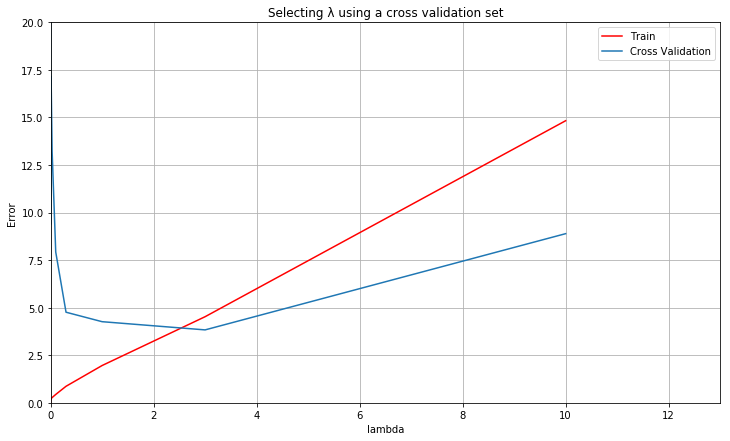

In [37]:
#Plotting graph between J(train) error and J(Cross validation) with training set size
plt.title('Selecting λ using a cross validation set')

plt.xlabel('lambda')
plt.ylabel('Error')

plt.xlim(0,13)
plt.ylim(0,20)
plt.grid(True)

plt.plot(lambda_vec,error_train_onLambda,'r-',label = 'Train')
plt.plot(lambda_vec,error_val_onLambda,'-',label = 'Cross Validation')

plt.rc('figure', figsize=(12, 7))

plt.legend()

In [28]:
#Selecting the Final Lambda

minIndex = np.argmin(error_val_onLambda) #computing the index at which the Cross validation error is minimum

FinalLambda = lambda_vec[minIndex] #Computing the final Lambda at the index corresponding to minIndex

print('Cross validation error is minimum at : ',minIndex)
print('Lambda obtained at minimum index : ',FinalLambda)


Cross validation error is minimum at :  8
Lambda obtained at minimum index :  3


 #  Computing test set error

In [29]:
#adding polynomial terms to the Test Set
Xtestpoly = polyFeature(Xtest,p)

print(Xtestpoly.shape)
#Normalizing the Test set
Xtestpoly = (Xtestpoly - mu)/sigma

#adding the bias unit
Xtestpoly = np.insert(Xtestpoly,0,1,1)

(21, 8)


In [30]:
#Computing the final theta(FinalizedTheta) obtained on lambda = 3(Final Lambda)

FinalizedTheta = trainLinearReg(X_poly, Y, FinalLambda,m)

Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 17
         Function evaluations: 330
         Gradient evaluations: 30


In [31]:
error_test = linearRegCostFunction(FinalizedTheta,Xtestpoly,Ytest,0,21) #Computing the error obtained test set

print('Error Test : ',error_test)
print('\nFinal Lambda : ',FinalLambda)
print('\nFinal Theta : ',FinalizedTheta)
print('\nError Cross Validation : ' ,error_val_onLambda)
print('\nError Train : ' ,error_train_onLambda)

Error Test :  3.572019544368159

Final Lambda :  3

Final Theta :  [11.21759237  6.52208511  3.82486755  3.61983922  2.18398325  2.10605119
  1.28078163  1.28791541  0.72491582]

Error Cross Validation :  [[52.6510546 ]
 [ 9.37167918]
 [15.94509931]
 [17.14658001]
 [13.21679253]
 [ 7.92675132]
 [ 4.76090173]
 [ 4.26334965]
 [ 3.83218093]
 [ 8.88970493]]

Error Train :  [[ 0.02889859]
 [ 0.10804719]
 [ 0.16684581]
 [ 0.21797258]
 [ 0.27517086]
 [ 0.43866302]
 [ 0.86812841]
 [ 1.95868847]
 [ 4.52510742]
 [14.82578448]]


# Plotting learning curves with randomly selected examples

# Plotting learning curves with randomly selected examples

In [32]:
iterations = 50 # total iterations for averaging the i examples

Randomerror_train = np.zeros((iterations,1)) # for storing the errors of
Randomerror_val = np.zeros((iterations,1))   # i examples

Avgtrain = np.zeros((m,1)) # for storing the average of average of
Avgval = np.zeros((m,1))   # 50 iterations of i examples(from 1 to 12)

#loop for storing average of each example of size i
for i in range(1,m+1):
    
    
    #loop of storing the errors of size i 50 times
    for j in range(iterations):
        
        #selecting random numbers from 1 to 12 of size for X
        randomNo1 = np.random.randint(0,m,size = i)
        
        #making matrix from random1
        randomXpoly = (X_poly[randomNo1])
        randomY = Y[randomNo1]
        
        #selecting random numbers from 1 to 21 of size for Xval
        randomNo2 = np.random.randint(0,len(Xval),size = i)
        
        #making matrix from random1
        randomXvalpoly = Xvalpoly[randomNo2]
        randomYval = (Yval[randomNo2])
        
        #training the theta for size X
        Theta = trainLinearReg(randomXpoly, randomY, 0.01,i)
        
        #getting training error for size of i
        Randomerror_train[j] = linearRegCostFunction(Theta,randomXpoly,randomY,0,i)   #  Lambda = 0 is sent here 
                                                                              #  because for error terms we have 
                                                                              #  regularized term = 0 so to make it zero
                                                                              #  we send Lambda  0 here
        #Cross validation error for size of i
        Randomerror_val[j] = linearRegCostFunction(Theta,randomXvalpoly,randomYval,0,i)
    
    #Average training error of train set of size i
    Avgtrain[i-1] = Randomerror_train.mean()
    
    #Average training error of cross validation of size i
    Avgval[i-1] = Randomerror_val.mean()
    

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 132
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 132
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 176
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 253
      

Optimization terminated successfully.
         Current function value: 0.001064
         Iterations: 28
         Function evaluations: 528
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 0.000141
         Iterations: 18
         Function evaluations: 429
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000804
         Iterations: 28
         Function evaluations: 638
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 0.000031
         Iterations: 4
         Function evaluations: 132
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.091106
         Iterations: 30
         Function evaluations: 594
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 0.000262
         Iterations: 4
         Function evaluations: 14

Optimization terminated successfully.
         Current function value: 0.102367
         Iterations: 23
         Function evaluations: 539
         Gradient evaluations: 49
Optimization terminated successfully.
         Current function value: 0.204988
         Iterations: 5
         Function evaluations: 176
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000711
         Iterations: 12
         Function evaluations: 363
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.114580
         Iterations: 5
         Function evaluations: 198
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.006183
         Iterations: 13
         Function evaluations: 396
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.199711
         Iterations: 32
         Function evaluations: 58

Optimization terminated successfully.
         Current function value: 0.490867
         Iterations: 58
         Function evaluations: 1155
         Gradient evaluations: 105
Optimization terminated successfully.
         Current function value: 0.152783
         Iterations: 43
         Function evaluations: 990
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 0.308909
         Iterations: 67
         Function evaluations: 1386
         Gradient evaluations: 126
Optimization terminated successfully.
         Current function value: 0.369824
         Iterations: 38
         Function evaluations: 858
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 0.092425
         Iterations: 92
         Function evaluations: 1771
         Gradient evaluations: 161
Optimization terminated successfully.
         Current function value: 0.255208
         Iterations: 12
         Function evaluat

Optimization terminated successfully.
         Current function value: 0.132327
         Iterations: 129
         Function evaluations: 2519
         Gradient evaluations: 229
Optimization terminated successfully.
         Current function value: 0.413861
         Iterations: 103
         Function evaluations: 2101
         Gradient evaluations: 191
Optimization terminated successfully.
         Current function value: 0.277488
         Iterations: 93
         Function evaluations: 2079
         Gradient evaluations: 189
Optimization terminated successfully.
         Current function value: 0.292290
         Iterations: 112
         Function evaluations: 2277
         Gradient evaluations: 207
Optimization terminated successfully.
         Current function value: 0.320391
         Iterations: 30
         Function evaluations: 649
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 0.120864
         Iterations: 96
         Function ev

Optimization terminated successfully.
         Current function value: 0.440474
         Iterations: 123
         Function evaluations: 2409
         Gradient evaluations: 219
Optimization terminated successfully.
         Current function value: 0.104343
         Iterations: 24
         Function evaluations: 484
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.130021
         Iterations: 150
         Function evaluations: 2816
         Gradient evaluations: 256
Optimization terminated successfully.
         Current function value: 0.210120
         Iterations: 37
         Function evaluations: 858
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 0.270612
         Iterations: 157
         Function evaluations: 3278
         Gradient evaluations: 298
Optimization terminated successfully.
         Current function value: 0.279626
         Iterations: 121
         Function eva

Optimization terminated successfully.
         Current function value: 0.418234
         Iterations: 171
         Function evaluations: 3223
         Gradient evaluations: 293
Optimization terminated successfully.
         Current function value: 0.376892
         Iterations: 95
         Function evaluations: 1848
         Gradient evaluations: 168
Optimization terminated successfully.
         Current function value: 0.410571
         Iterations: 178
         Function evaluations: 3784
         Gradient evaluations: 344
Optimization terminated successfully.
         Current function value: 0.158174
         Iterations: 81
         Function evaluations: 1749
         Gradient evaluations: 159
Optimization terminated successfully.
         Current function value: 0.275647
         Iterations: 91
         Function evaluations: 1793
         Gradient evaluations: 163
Optimization terminated successfully.
         Current function value: 0.248029
         Iterations: 115
         Function 

Optimization terminated successfully.
         Current function value: 0.243393
         Iterations: 177
         Function evaluations: 3773
         Gradient evaluations: 343
Optimization terminated successfully.
         Current function value: 0.334956
         Iterations: 212
         Function evaluations: 3971
         Gradient evaluations: 361
Optimization terminated successfully.
         Current function value: 0.159482
         Iterations: 171
         Function evaluations: 3762
         Gradient evaluations: 342
Optimization terminated successfully.
         Current function value: 0.230080
         Iterations: 143
         Function evaluations: 2783
         Gradient evaluations: 253
Optimization terminated successfully.
         Current function value: 0.240967
         Iterations: 78
         Function evaluations: 1408
         Gradient evaluations: 128
Optimization terminated successfully.
         Current function value: 0.244851
         Iterations: 106
         Functio

Optimization terminated successfully.
         Current function value: 0.271519
         Iterations: 188
         Function evaluations: 3520
         Gradient evaluations: 320
Optimization terminated successfully.
         Current function value: 0.289325
         Iterations: 161
         Function evaluations: 3267
         Gradient evaluations: 297
Optimization terminated successfully.
         Current function value: 0.104171
         Iterations: 165
         Function evaluations: 3366
         Gradient evaluations: 306
Optimization terminated successfully.
         Current function value: 0.152685
         Iterations: 107
         Function evaluations: 2145
         Gradient evaluations: 195
Optimization terminated successfully.
         Current function value: 0.274120
         Iterations: 139
         Function evaluations: 3025
         Gradient evaluations: 275
Optimization terminated successfully.
         Current function value: 0.203897
         Iterations: 82
         Functio

Optimization terminated successfully.
         Current function value: 0.068930
         Iterations: 69
         Function evaluations: 1496
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: 0.221364
         Iterations: 94
         Function evaluations: 2090
         Gradient evaluations: 190
Optimization terminated successfully.
         Current function value: 0.284813
         Iterations: 125
         Function evaluations: 2431
         Gradient evaluations: 221
Optimization terminated successfully.
         Current function value: 0.222795
         Iterations: 205
         Function evaluations: 3696
         Gradient evaluations: 336
Optimization terminated successfully.
         Current function value: 0.210149
         Iterations: 38
         Function evaluations: 847
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 0.148154
         Iterations: 86
         Function eva

Optimization terminated successfully.
         Current function value: 0.318174
         Iterations: 172
         Function evaluations: 3564
         Gradient evaluations: 324
Optimization terminated successfully.
         Current function value: 0.296193
         Iterations: 215
         Function evaluations: 4620
         Gradient evaluations: 420
Optimization terminated successfully.
         Current function value: 0.411418
         Iterations: 219
         Function evaluations: 4455
         Gradient evaluations: 405
Optimization terminated successfully.
         Current function value: 0.265520
         Iterations: 182
         Function evaluations: 3498
         Gradient evaluations: 318
Optimization terminated successfully.
         Current function value: 0.320598
         Iterations: 287
         Function evaluations: 5720
         Gradient evaluations: 520
Optimization terminated successfully.
         Current function value: 0.363584
         Iterations: 134
         Functi

Optimization terminated successfully.
         Current function value: 0.267326
         Iterations: 158
         Function evaluations: 3201
         Gradient evaluations: 291
Optimization terminated successfully.
         Current function value: 0.232327
         Iterations: 128
         Function evaluations: 2552
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: 0.345363
         Iterations: 144
         Function evaluations: 2827
         Gradient evaluations: 257
Optimization terminated successfully.
         Current function value: 0.176193
         Iterations: 108
         Function evaluations: 2156
         Gradient evaluations: 196
Optimization terminated successfully.
         Current function value: 0.235951
         Iterations: 133
         Function evaluations: 2937
         Gradient evaluations: 267
Optimization terminated successfully.
         Current function value: 0.273105
         Iterations: 202
         Functi

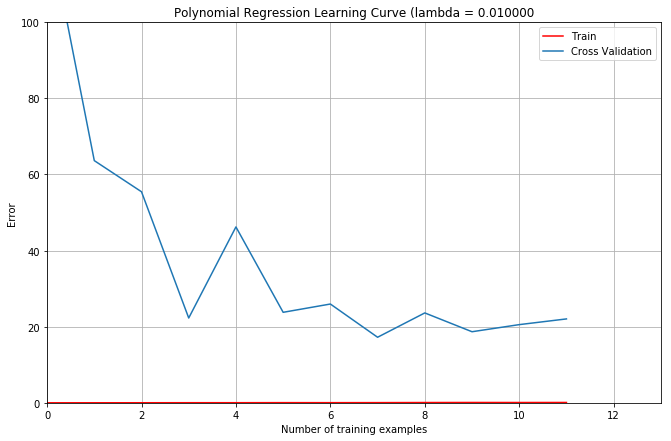

In [33]:
plt.title('Polynomial Regression Learning Curve (lambda = 0.010000')

plt.xlabel('Number of training examples')
plt.ylabel('Error')

plt.xlim(0,13)
plt.ylim(0,100)
plt.grid(True)

plt.plot(Avgtrain,'r-',label = 'Train')
plt.plot(Avgval,'-',label = 'Cross Validation')

plt.rc('figure', figsize=(11, 7))

plt.legend()